# Classificação de Imagens de Roupas (Fashion MNIST)

## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.saving import load_model

## Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist.load_data()
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset

## Exploração dos dados

In [3]:
print(f"Quantidade de imagens de treino: %d" % len(imagens_treino))

Quantidade de imagens de treino: 60000


In [4]:
imagens_treino.shape

(60000, 28, 28)

In [5]:
len(identificacoes_treino)

60000

## Exibição dos dados

Text(0.5, 1.0, '9')

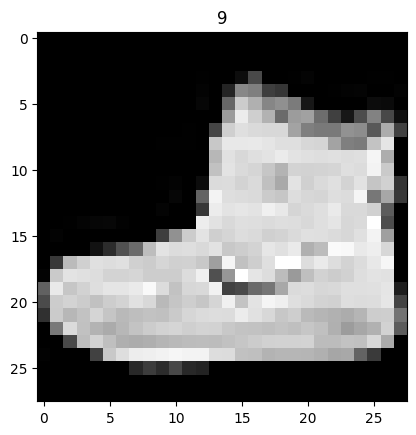

In [6]:
plt.imshow(imagens_treino[0], cmap='gray')
plt.title(identificacoes_treino[0])

In [7]:
identificacoes_treino.min()
identificacoes_treino.max()
total_de_classificacoes = identificacoes_treino.max() - identificacoes_treino.min() + 1
print(f"Total de classificações: {total_de_classificacoes}")

Total de classificações: 10


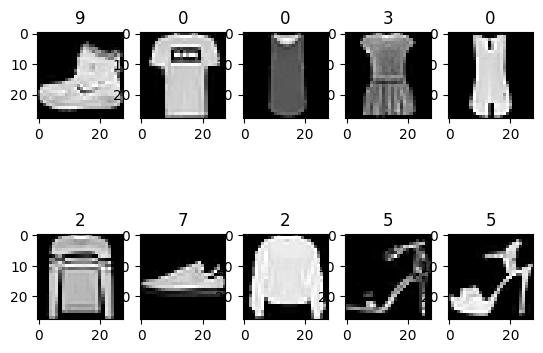

In [8]:
for imagem in range(total_de_classificacoes):
  plt.subplot(2, 5, imagem + 1)
  plt.imshow(imagens_treino[imagem], cmap='gray')
  plt.title(identificacoes_treino[imagem])

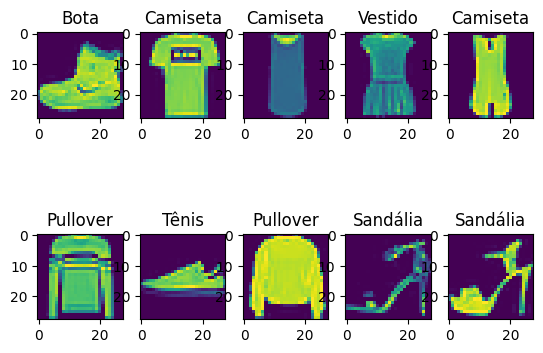

In [9]:
nomes_de_classificacoes = [
    'Camiseta', 'Calça', 
    'Pullover', 'Vestido', 
    'Casaco', 'Sandália', 
    'Camisa', 'Tênis', 
    'Bolsa', 'Bota']

for imagem in range(total_de_classificacoes):
    plt.subplot(2, 5, imagem + 1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])


## Normalização dos dados

In [10]:
# Normalização
imagens_treino = imagens_treino/float(255)
imagens_teste = imagens_teste/float(255)

## Modelo


- Modelo = Sequencial
    - Entrada
    - Processamento
    - Saída


Criando o modelo
Compilando o modelo
Treinando o modelo
Normalização dos dados com Dropout

In [11]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)



Epoch 1/10


1500/1500 [==============================] - 7s 4ms/step - loss: 0.5277 - accuracy: 0.8137 - val_loss: 0.4236 - val_accuracy: 0.8457
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3975 - accuracy: 0.8558 - val_loss: 0.4051 - val_accuracy: 0.8541
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3611 - accuracy: 0.8676 - val_loss: 0.3561 - val_accuracy: 0.8696
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3417 - accuracy: 0.8745 - val_loss: 0.3522 - val_accuracy: 0.8687
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3217 - accuracy: 0.8815 - val_loss: 0.3480 - val_accuracy: 0.8698
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3109 - accuracy: 0.8852 - val_loss: 0.3475 - val_accuracy: 0.8784
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2984 - accuracy: 0.8892 - val_loss: 0.3251 - val_accur

## Sumário do modelo

In [24]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Pesos da primeira camada densa

In [29]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 8.0655869e-03, -1.0148060e-01,  5.9297293e-02, ...,
        -2.2307573e-01, -5.8400873e-02,  9.8740600e-02],
       [-1.6953473e-01, -1.5234844e-01,  3.2176721e-01, ...,
         1.9964881e-01, -2.0350115e-01,  4.1692045e-02],
       [ 1.1179115e-01, -1.7764565e-01,  1.7099580e-01, ...,
        -2.0628294e-01, -2.0301385e-01,  6.2202364e-02],
       ...,
       [ 1.0041610e-01,  1.1475386e-01,  3.4378659e-02, ...,
        -5.5560464e-01, -7.9264604e-02, -3.0423822e-02],
       [ 3.8134497e-01, -5.5698948e-03,  6.5446876e-02, ...,
        -4.3296799e-01, -8.2222410e-03,  5.2419445e-04],
       [ 2.7869990e-01,  2.0714102e-02,  3.2390395e-01, ...,
        -3.1776413e-01, -3.0277449e-01,  3.3647131e-02]], dtype=float32)

In [37]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))
pesos_camada_dense_zerados

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

# modelo.layers[1].set_weights([pesos_camada_dense_zerados, modelo.layers[1].get_weights()[1]])
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, modelo.layers[1].get_weights()[1]])
modelo.layers[1].get_weights()[0]

array([[0.7138473 , 0.05119127, 0.7905248 , ..., 0.6803846 , 0.6884465 ,
        0.14773703],
       [0.2897526 , 0.8872807 , 0.9141425 , ..., 0.6497032 , 0.9547323 ,
        0.65170914],
       [0.1995291 , 0.3840954 , 0.2416316 , ..., 0.20614366, 0.66754127,
        0.9747905 ],
       ...,
       [0.45553684, 0.33736247, 0.4681446 , ..., 0.6617179 , 0.4248504 ,
        0.37190005],
       [0.83266044, 0.28470328, 0.6802275 , ..., 0.49098164, 0.3910805 ,
        0.02525112],
       [0.53228444, 0.03630675, 0.76878256, ..., 0.5340535 , 0.6977507 ,
        0.00839488]], dtype=float32)

In [38]:
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 137.1958 - accuracy: 0.4161 - val_loss: 20.8857 - val_accuracy: 0.7042
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 36.9340 - accuracy: 0.6328 - val_loss: 11.8136 - val_accuracy: 0.7684
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 17.8035 - accuracy: 0.7024 - val_loss: 7.8449 - val_accuracy: 0.7653
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 8.8574 - accuracy: 0.7394 - val_loss: 3.9658 - val_accuracy: 0.8153
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 4.6466 - accuracy: 0.7602 - val_loss: 2.8689 - val_accuracy: 0.8129


In [39]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Ze

## Vieses da primeira camada densa

In [41]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [43]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights([modelo.layers[1].get_weights()[0], vieses_camada_dense_zerados])

In [44]:
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 5ms/step - loss: 2.6181 - accuracy: 0.7711 - val_loss: 1.6828 - val_accuracy: 0.7970
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 1.3346 - accuracy: 0.7975 - val_loss: 0.9747 - val_accuracy: 0.8213
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7643 - accuracy: 0.8228 - val_loss: 0.6433 - val_accuracy: 0.8424
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5467 - accuracy: 0.8380 - val_loss: 0.5300 - val_accuracy: 0.8479
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4570 - accuracy: 0.8480 - val_loss: 0.5401 - val_accuracy: 0.8577


## Testes

In [48]:
adam = keras.optimizers.Adam(learning_rate=0.0001)

modelo.compile(
    optimizer=adam, # Utilizando um otimizador personalizado
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

historico = modelo.fit(
    imagens_treino, 
    identificacoes_treino, 
    batch_size=480, # Adicionando o batch_size
    epochs=5, 
    validation_split=0.2
)

Epoch 1/5
100/100 [==============================] - 3s 14ms/step - loss: 0.4051 - accuracy: 0.8623 - val_loss: 0.4579 - val_accuracy: 0.8650
Epoch 2/5
100/100 [==============================] - 1s 9ms/step - loss: 0.3932 - accuracy: 0.8675 - val_loss: 0.4509 - val_accuracy: 0.8667
Epoch 3/5
100/100 [==============================] - 1s 13ms/step - loss: 0.3859 - accuracy: 0.8684 - val_loss: 0.4462 - val_accuracy: 0.8674
Epoch 4/5
100/100 [==============================] - 1s 11ms/step - loss: 0.3837 - accuracy: 0.8679 - val_loss: 0.4452 - val_accuracy: 0.8677
Epoch 5/5
100/100 [==============================] - 1s 11ms/step - loss: 0.3813 - accuracy: 0.8682 - val_loss: 0.4416 - val_accuracy: 0.8671


In [50]:
# Checkpoint
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss'), # Parar o treinamento caso a loss da validação pare de diminuir
    keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', # Salvar o modelo com a menor loss de validação
                                    monitor='val_loss', save_best_only=True)
]

modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

historico = modelo.fit(
    imagens_treino, 
    identificacoes_treino, 
    epochs=5, 
    validation_split=0.2,
    callbacks=[callbacks]
)

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.3249 - accuracy: 0.8825 - val_loss: 0.4212 - val_accuracy: 0.8649
Epoch 2/5
  39/1500 [..............................] - ETA: 5s - loss: 0.3083 - accuracy: 0.8910

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 5ms/step - loss: 0.3137 - accuracy: 0.8844 - val_loss: 0.3890 - val_accuracy: 0.8787
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3024 - accuracy: 0.8886 - val_loss: 0.3871 - val_accuracy: 0.8761
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2942 - accuracy: 0.8914 - val_loss: 0.3830 - val_accuracy: 0.8776
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2839 - accuracy: 0.8953 - val_loss: 0.3875 - val_accuracy: 0.8772


## Salvando o modelo

In [12]:
modelo.save('modelo.keras')

## Carregando o modelo

In [13]:
modelo_salvo = load_model("modelo.keras")

## Visualizando as acurácias de treino e validação por época

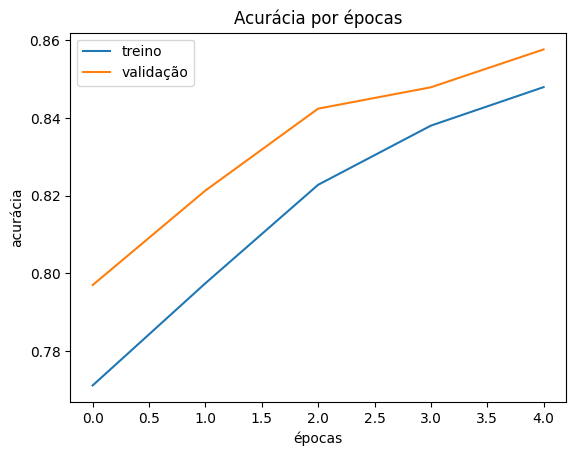

In [46]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])
plt.show()

## Visualizando as perdas de treino e validação por época

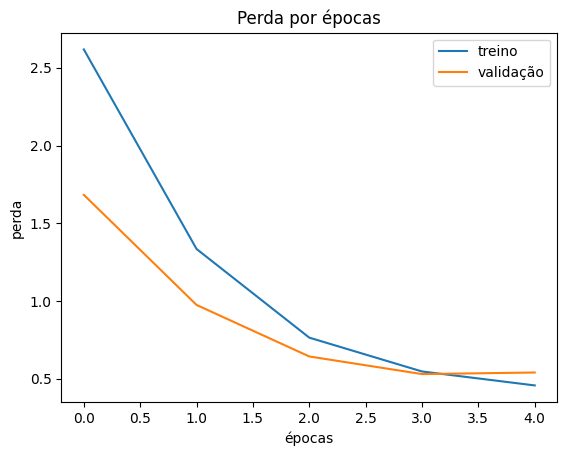

In [45]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])
plt.show()

## Testando e Avaliando o modelo

In [16]:
testes = modelo.predict(imagens_teste)
print(f"Resultado teste: {testes[0]}")

313/313 [==============================] - 1s 2ms/step
Resultado teste: [2.8354966e-08 2.8176934e-09 9.0843429e-08 3.6886798e-09 2.3773677e-07
 2.8896960e-04 1.5437463e-07 1.0409829e-03 1.9206874e-08 9.9866962e-01]


In [17]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f"Resultado teste modelo salvo: {testes_modelo_salvo[0]}")

313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo: [2.8354966e-08 2.8176934e-09 9.0843429e-08 3.6886798e-09 2.3773677e-07
 2.8896960e-04 1.5437463e-07 1.0409829e-03 1.9206874e-08 9.9866962e-01]


In [18]:
print('resultado teste:', np.argmax(testes[0]))
print('número da imagem de teste:', identificacoes_teste[0])

resultado teste: 9
número da imagem de teste: 9


In [19]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f"Perda do teste: {perda_teste}")
print(f"Acurácia do teste: {acuracia_teste}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8786
Perda do teste: 0.344173401594162
Acurácia do teste: 0.878600001335144


In [20]:
perda_teste_modelo_salvo, acuracia_teste_modelo_salvo = modelo_salvo.evaluate(imagens_teste, identificacoes_teste)
print(f"Perda do teste modelo salvo: {perda_teste_modelo_salvo}")
print(f"Acurácia do teste modelo salvo: {acuracia_teste_modelo_salvo}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8786
Perda do teste modelo salvo: 0.344173401594162
Acurácia do teste modelo salvo: 0.878600001335144
